# **Clustering**

## Loading and Preparing the Data

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

numeric_cols = ["Year", "Popularity", "Vote_Count", "Vote_Average", "IMDb_Rating"]
df_numeric = df[numeric_cols].dropna()

labels = df["Winner"] if "Winner" in df else None

print(df_numeric.head())
df_numeric.to_csv('Clustering_preprocessed.csv', index=False)

   Year  Popularity  Vote_Count  Vote_Average  IMDb_Rating
0  1972       6.822          75           6.8          7.2
1  2019      45.996       12542           8.0          8.2
2  2019      45.996       12542           8.0          8.2
3  2019      45.996       12542           8.0          8.2
4  2019      45.996       12542           8.0          8.2


## Normalizing the Data

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

print(df_scaled.head())
df_scaled.to_csv('Clustering_normalized.csv', index=False)

       Year  Popularity  Vote_Count  Vote_Average  IMDb_Rating
0 -0.242253   -0.284831   -0.552694     -0.483343    -0.377077
1  1.451832    0.261674    1.974336      1.322624     1.284869
2  1.451832    0.261674    1.974336      1.322624     1.284869
3  1.451832    0.261674    1.974336      1.322624     1.284869
4  1.451832    0.261674    1.974336      1.322624     1.284869


## PCA for Dimensionality Reduction

In [4]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])

variance_retained = np.sum(pca.explained_variance_ratio_) * 100
print(f"Variance retained after PCA reduction to 3D: {variance_retained:.2f}%")

print(df_pca.head())
df_pca.to_csv('Clustering_PCA.csv', index=False)

Variance retained after PCA reduction to 3D: 88.83%
        PC1       PC2       PC3
0 -0.890460 -0.042729 -0.037609
1  2.920955  0.158855 -0.821640
2  2.920955  0.158855 -0.821640
3  2.920955  0.158855 -0.821640
4  2.920955  0.158855 -0.821640


## K-Means Clustering with Silhouette Analysis

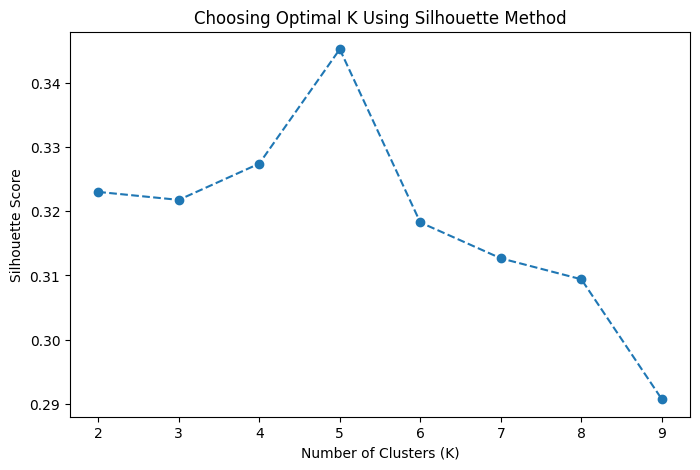

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_k = range(2, 10)
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Choosing Optimal K Using Silhouette Method")
plt.show()

## K-Means with Best K and Visualize

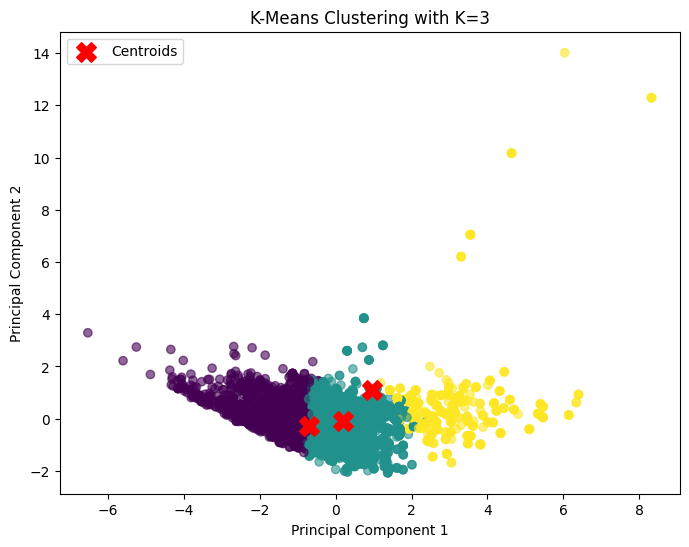

In [6]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering with K={best_k}")
plt.legend()
plt.show()

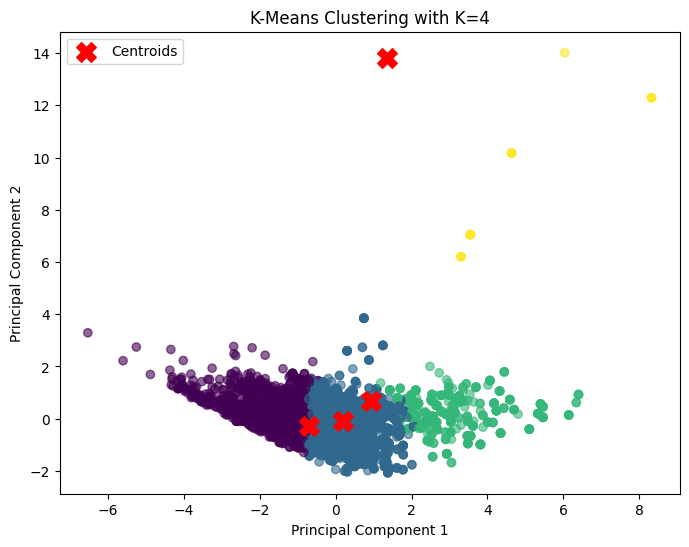

In [7]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering with K={best_k}")
plt.legend()
plt.show()

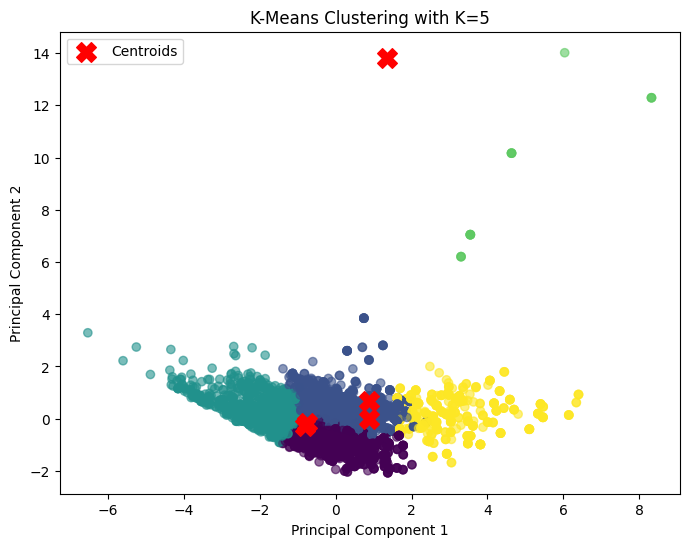

In [8]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering with K={best_k}")
plt.legend()
plt.show()

## Hierarchical Clustering and Dendrogram

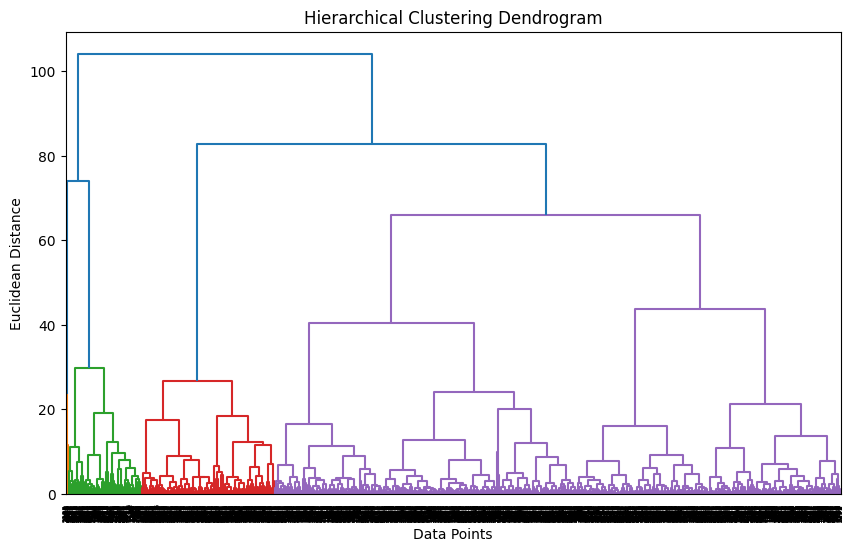

In [9]:
import scipy.cluster.hierarchy as sch

# Generate a dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method="ward"))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

## DBSCAN Clustering

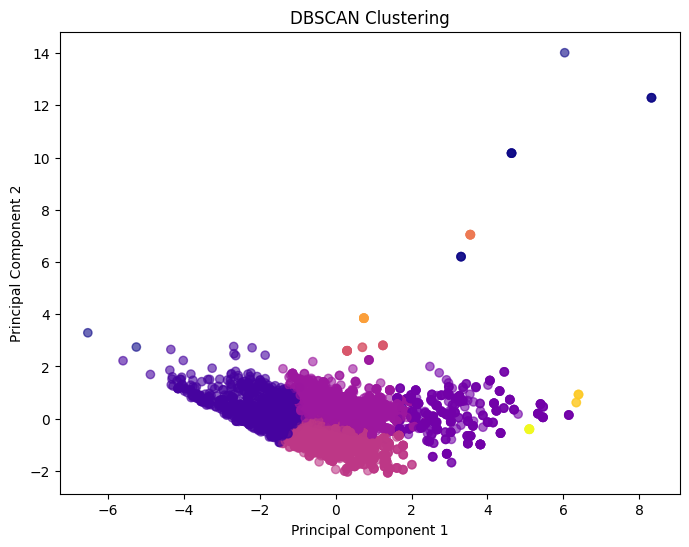

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=5)
df_pca["DBSCAN_Cluster"] = dbscan.fit_predict(df_pca)

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["DBSCAN_Cluster"], cmap="plasma", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering")
plt.show()

## Comparing Clustering Results

In [11]:
print(f"K-Means Cluster Counts: {df_pca['Cluster'].value_counts().to_dict()}")
print(f"DBSCAN Cluster Counts (including noise points as -1): {df_pca['DBSCAN_Cluster'].value_counts().to_dict()}")

K-Means Cluster Counts: {1: 1454, 0: 1242, 2: 953, 4: 453, 3: 16}
DBSCAN Cluster Counts (including noise points as -1): {2: 1435, 3: 1242, 0: 951, 1: 442, 4: 13, -1: 13, 8: 6, 6: 6, 5: 5, 7: 5}
